In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

## MNIST Dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser = 'auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist.categories

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}

In [46]:
X = mnist.data
y = mnist.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Binary Classification

In [8]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
clf = SGDClassifier(random_state = 42)
clf.fit(X_train,y_train_5)
y_pred_5 = clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test_5, y_pred_5)}')
print(f'Recall = {recall_score(y_test_5, y_pred_5)}')
print(f'Precision = {precision_score(y_test_5, y_pred_5)}')
print(f'F1 = {f1_score(y_test_5, y_pred_5)}')

Accuracy = 0.9685
Recall = 0.7376276512175962
Precision = 0.8977055449330784
F1 = 0.8098318240620959


## Multiclass Classification

In [62]:
from sklearn.svm import SVC
m_clf = SVC(random_state = 42)
m_clf.fit(X_train,y_train)
y_pred = m_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}') # for multi class classification

Accuracy = 0.9764285714285714
Recall = 0.9762666612492419
Precision = 0.9763608291708306
F1 = 0.9762962373195112


In [83]:
clf_2 = SGDClassifier(random_state = 42)
clf_2.fit(X_train,y_train)

SGDClassifier(random_state=42)

## Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_2, X_train,y_train,cv=3, scoring = 'accuracy')

array([0.84212782, 0.87416296, 0.83129755])

## Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.9455714285714286
Recall = 0.944925354183292
Precision = 0.9451050866897122
F1 = 0.944862638853475


In [96]:
from sklearn.metrics import confusion_matrix
bin_preds = clf.predict(X_test)
svc_preds = m_clf.predict(X_test)
sgd_preds = clf_2.predict(X_test)
rfc_preds = rf_clf.predict(X_test)

bin_conf_m = confusion_matrix(y_test_5,bin_preds)
svc_conf_m = confusion_matrix(y_test, svc_preds)
sgd_conf_m = confusion_matrix(y_test,sgd_preds)
rfc_preds = confusion_matrix(y_test,rfc_preds)

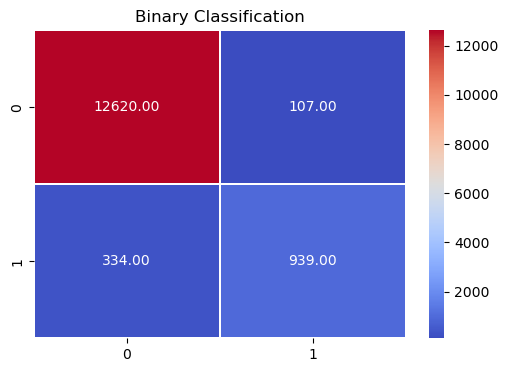

In [105]:
plt.figure(figsize = (6,4))
sns.heatmap(bin_conf_m, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.2)
plt.title('Binary Classification')
plt.show()

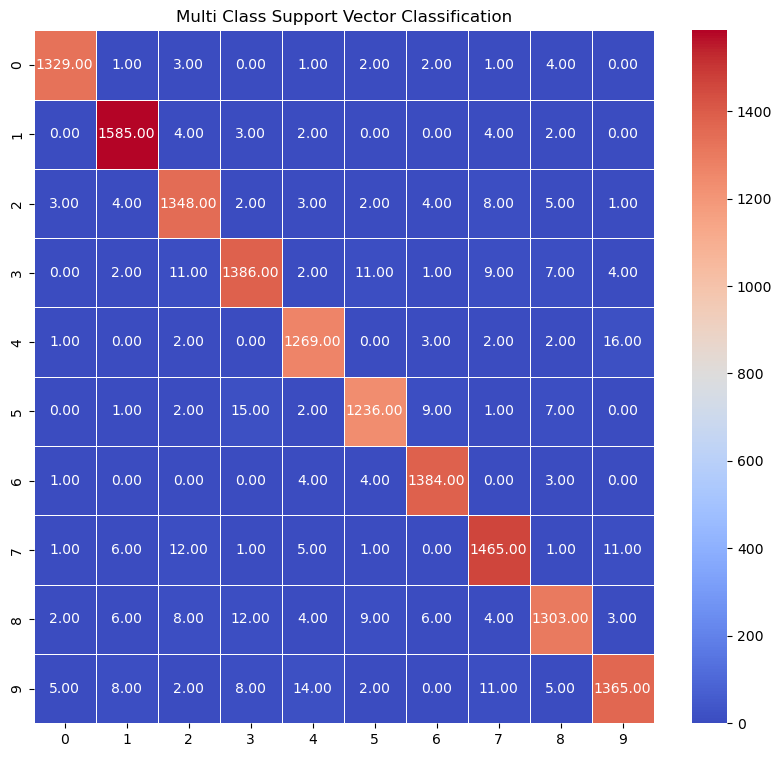

In [106]:
plt.figure(figsize = (10,9))
sns.heatmap(svc_conf_m, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.4)
plt.title('Multi Class Support Vector Classification')
plt.show()

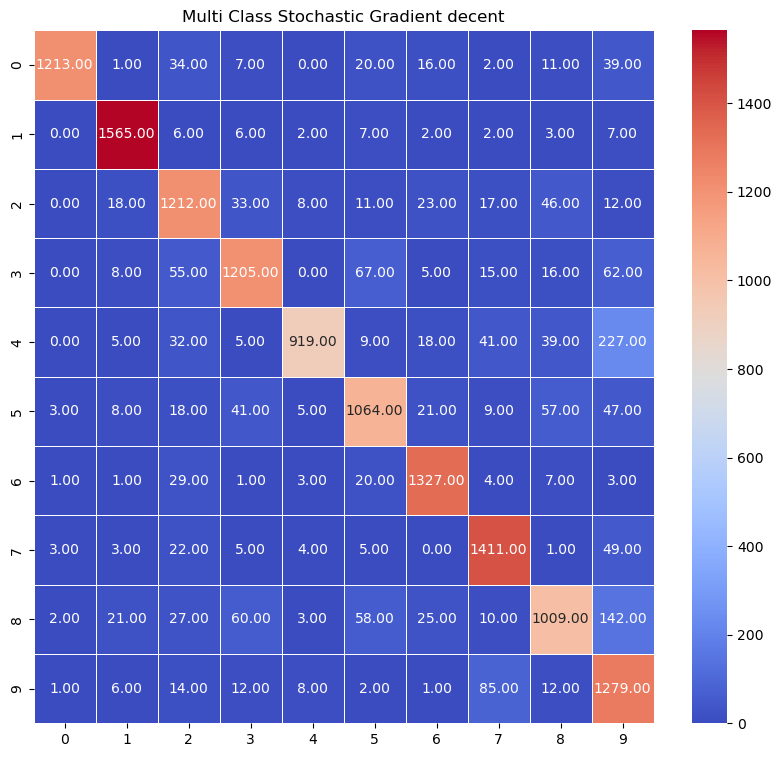

In [107]:
plt.figure(figsize = (10,9))
sns.heatmap(sgd_conf_m, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.4)
plt.title('Multi Class Stochastic Gradient decent')
plt.show()

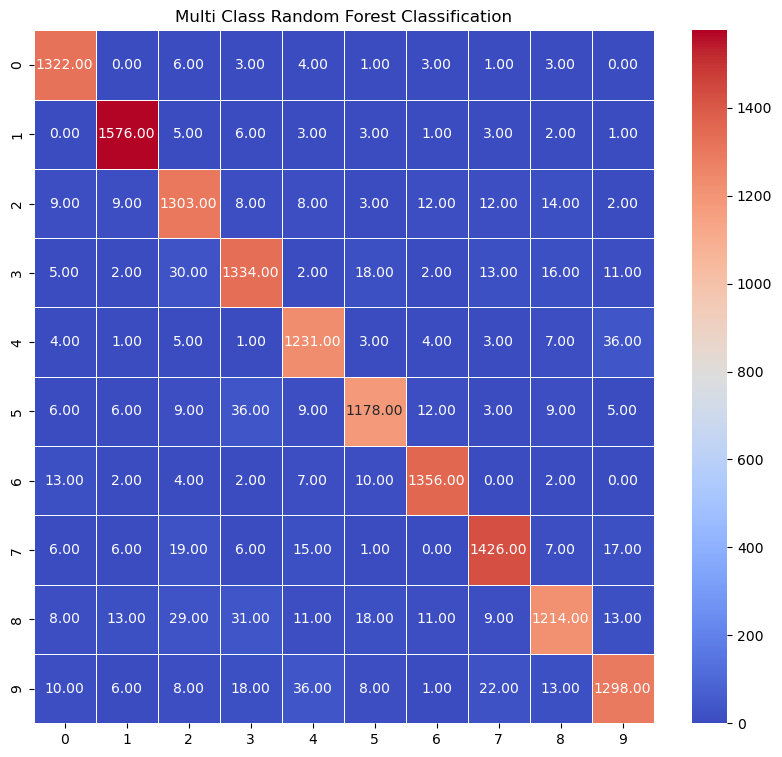

In [108]:
plt.figure(figsize = (10,9))
sns.heatmap(rfc_preds, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.4)
plt.title('Multi Class Random Forest Classification')

plt.show()

### Trying CNN model Approach

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical

In [47]:
from sklearn.preprocessing import LabelEncoder
import math

root_factor = int(math.sqrt(X.shape[1])) # since all the images are same
X = X.reshape((X.shape[0],root_factor,root_factor,1))

label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_name}")

0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9


In [48]:
X_train.shape

(56000, 28, 28, 1)

In [49]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [50]:
cnn_model = Sequential()
cnn_model.add(Input(shape = (X_train.shape[1],X_train.shape[2],1)))
cnn_model.add(Conv2D(8,(3,3), padding="same", activation = 'relu'))
cnn_model.add(MaxPooling2D((2,2),padding = "same"))
cnn_model.add(Conv2D(16,(2,2), padding="same", activation = 'relu'))
cnn_model.add(MaxPooling2D((2,2), padding ="same"))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2)) # preventing overfitting
cnn_model.add(Dense(10, activation = "softmax"))

cnn_model.compile(optimizer = "adam",loss= "categorical_crossentropy", metrics = ['accuracy'])

cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 16)          │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,458 (33.04 KB)

 Trainable params: 8,458 (33.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = cnn_model.fit(X_train,y_train, epochs = 20,batch_size = 16, validation_split = 0.2)

Epoch 1/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7604 - loss: 4.1316 - val_accuracy: 0.9537 - val_loss: 0.1470
Epoch 2/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9451 - loss: 0.1818 - val_accuracy: 0.9659 - val_loss: 0.1150
Epoch 3/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9578 - loss: 0.1376 - val_accuracy: 0.9678 - val_loss: 0.1128
Epoch 4/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9616 - loss: 0.1197 - val_accuracy: 0.9698 - val_loss: 0.0992
Epoch 5/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9631 - loss: 0.1095 - val_accuracy: 0.9724 - val_loss: 0.0900
Epoch 6/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9699 - loss: 0.0972 - val_accuracy: 0.9751 - val_loss: 0.0859
Epoch 7/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9706 - loss: 0.0919 - val_accuracy: 0.9748 - val_loss: 0.0860
Epoch 8/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9732 - loss: 0.0860 - 

In [57]:
loss,accuracy = cnn_model.evaluate(X_test,y_test)
cnn_preds = cnn_model.predict(X_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9733 - loss: 0.0866
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


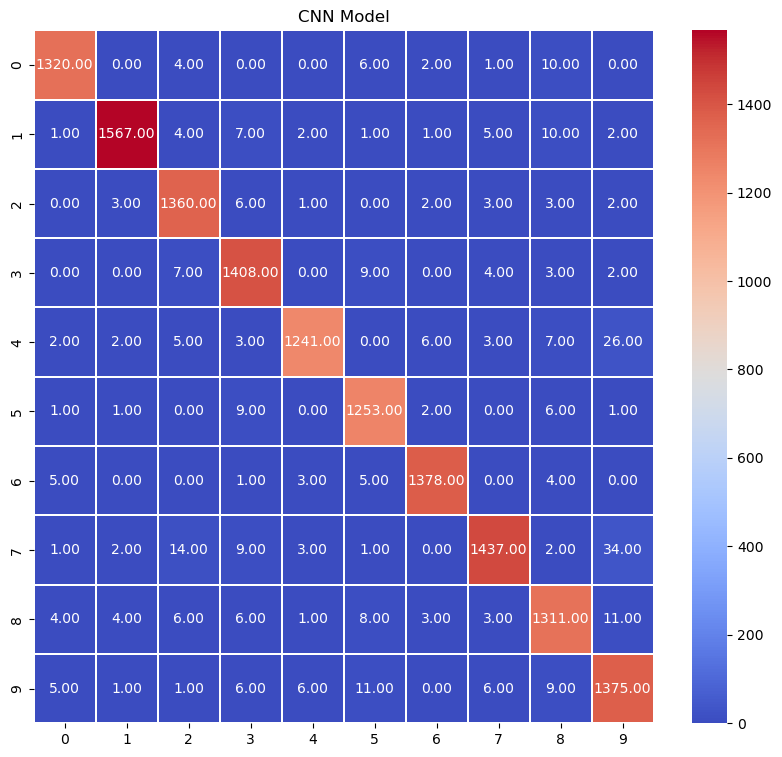

In [60]:

cnn_preds_class = np.argmax(cnn_preds, axis=1)
y_test_class = np.argmax(y_test, axis=1)
cnn_conf_matrix = confusion_matrix(y_test_class, cnn_preds_class)

plt.figure(figsize = (10,9))
sns.heatmap(cnn_conf_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.2)
plt.title('CNN Model')
plt.show()